## Linear Regression 
#### Breaking out the linear equation and finding out the best fit values for the Slope and y-Intercept 
#### The general linear equation would be 
$
\begin{align}
    {\displaystyle \mathbf{Y}=  \beta \: \mathbf{X} + \mathbf{b} }
\end{align}
$
<br><br>
where, <br>
$\beta $ : slope <br>
$\mathbf {b} $ : y-intercept 

#### Best fit $\beta$ value:
$ 
\begin{align}
\beta = { \frac {\overline{x} \cdot \overline{y} - \overline{xy} }  { \left(\overline{x}\right)^2 - \overline{x^2}} }
\end{align}
$

#### Best fit $\mathbf{b}$ value:
$
\begin{align}
    \mathbf{b} = \overline{y} - \beta \: \overline{x}
\end{align}
$


(cf. [Equations for slope and y-intercept](https://www.freecodecamp.org/news/machine-learning-mean-squared-error-regression-line-c7dde9a26b93/))


### Importing librairies 

In [35]:
from statistics import mean 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
import random
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

### Create a small dataset 

In [76]:
#X = np.array([1,2,3,4,5,6], dtype=np.float64)
#Y = np.array([5,4,6,5,6,7], dtype=np.float64)

# "step" in y 
# correlation: False;Negative correlation | True;Positive correlation  
# variance: considering a range of values, and used to increase or decrease the variance in "y"
def create_dataset(n, variance, step=2, correlation=False):
    val = 1
    Y = []
    for i in range(n):
        y = val + random.randrange(-variance, variance)
        Y.append(y)
        if correlation:
            val += step 
        else:
            val -= step 
    X = [i for i in range(len(Y))]
    
    return np.array(X, dtype=np.float64), np.array(Y, dtype=np.float64) 
    
X, Y = create_dataset(40, 10, 2, correlation=True)    

### Computing the slope and y-intercept

In [77]:
def best_fit_slope_intercept(X, Y):
    beta = ( ( mean(X) * mean(Y) - mean(X*Y) ) / 
             ( mean(X)**2 - mean(X**2) ) 
           )
    b = mean(Y) - beta * mean(X)
    return beta, b

beta, b = best_fit_slope_intercept(X,Y)

### Plot the best fit line 

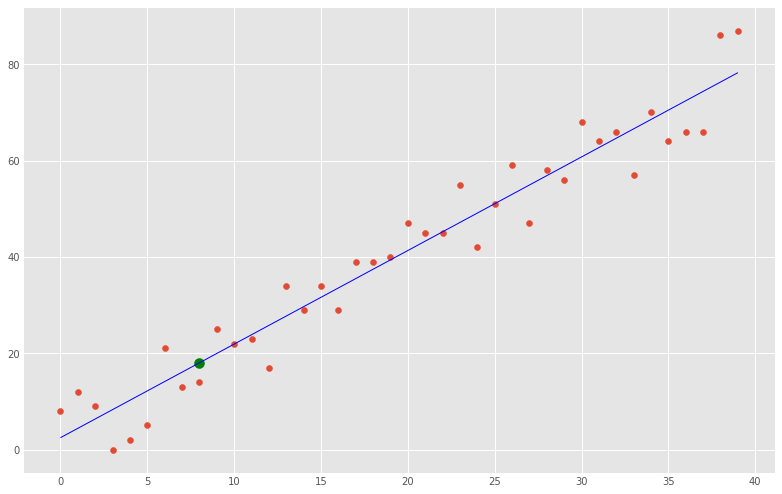

In [78]:
y_regression = [(beta * x) + b for x in X]

# Forecasting an unknown X
predict_x = 8
predict_y = (beta * predict_x) + b

plt.plot(X,y_regression, linewidth=1, color='b')
plt.scatter(predict_x,predict_y, s=100, c='g')
plt.scatter(X,Y)
plt.show()

### Coefficient of determination: $R^2$- Error

#### $R^{2}$ can be considered as accuracy in case of Regression problem 

$
\begin{align}
    \mathbf{R^2} = MSE = 1 - {\frac {SE  \hat{y}} {SE  \overline{y}}}
\end{align}
$
<br><br>
Where, <br>
$SE \hat{y}$: predicted-y squared error  <br>
$SE \overline{y}$: mean-y squared error  <br>

In [80]:
def squared_error(Y, y_predict):
    return sum((Y - y_predict)**2)

def coef_determination(Y, y_predict):
    y_mean = [mean(Y) for y in Y]
    squared_error_reg = squared_error(Y, y_predict)
    squared_error_y_mean = squared_error(Y, y_mean)
    coef_det = 1 - (squared_error_reg / squared_error_y_mean)
    return coef_det

r_squared = coef_determination(Y, y_regression)

print('R-squared Error: {}'.format(r_squared))

R-squared Error: 0.9406522444706977


### Testing assumptions 